In [3]:
import pandas                             as    pd
import numpy                              as    np
import matplotlib.pyplot                  as    plt
import seaborn                            as    sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection              import train_test_split

import statsmodels
import statsmodels.api                    as      sm

from sklearn.preprocessing                import   StandardScaler,LabelEncoder

from sklearn                              import   metrics
from sklearn.metrics                      import   classification_report
from sklearn.metrics                      import   cohen_kappa_score
from sklearn.metrics                      import   confusion_matrix
from sklearn.metrics                      import   roc_curve, roc_auc_score
from sklearn.metrics                      import   accuracy_score
from sklearn.metrics                      import   ConfusionMatrixDisplay

from sklearn.linear_model                 import   LogisticRegression
from sklearn.tree                         import   DecisionTreeClassifier
from sklearn.ensemble                     import   RandomForestClassifier
from sklearn                              import   tree
from sklearn.model_selection              import   GridSearchCV

import pydotplus
from IPython.display import Image 

import time
from datetime import timedelta


In [4]:
"""
  Function Name: compare_models

  Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
  Input:  1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable

   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""

def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot              as       plt
    from    sklearn.model_selection        import   KFold
    from    sklearn.model_selection        import   RepeatedStratifiedKFold
    from    sklearn.model_selection        import   cross_val_score
    
    from    sklearn.linear_model           import   LogisticRegression ### -------  Model 1 ----------------------
    from    sklearn.tree                   import   DecisionTreeClassifier ### -------  Model 2 ----------------------
    from    sklearn.neighbors              import   KNeighborsClassifier ### -------  Model 3 ----------------------
    from    sklearn.naive_bayes            import   GaussianNB ### -------  Model 4 ----------------------
    from    sklearn.ensemble               import   RandomForestClassifier ### -------  Model 5 ----------------------
    from    xgboost                        import   XGBClassifier ### -------  Model 6 ----------------------
    from    sklearn.ensemble               import   AdaBoostClassifier ### -------  Model 7 ----------------------
    from    sklearn.ensemble               import   GradientBoostingClassifier ### -------  Model 8 ----------------------
    from    sklearn.discriminant_analysis  import   LinearDiscriminantAnalysis as LDA ### -------  Model 9 ------------------
    from    sklearn.svm                    import   SVC ### -------  Model 10 ----------------------

    ### Prepare models
    
    models  = []

    models.append(('LR',   LogisticRegression())) # 1
    models.append(('CART', DecisionTreeClassifier())) # 2
    models.append(('RF',   RandomForestClassifier()))
    models.append(('KNN',  KNeighborsClassifier())) # 3 
    models.append(('NB',   GaussianNB())) # 4
     # 5
    models.append(('XGB',  XGBClassifier())) # 6 
    models.append(('ADA',  AdaBoostClassifier())) # 7 
    models.append(('GB',   GradientBoostingClassifier ())) # 8     
    models.append(('LDA',  LDA())) # 9 
    ## models.append(('SVC',  SVC(gamma = 'auto', kernel = 'rbf'))) # 10

   
    ### Evaluate model in turn
    
    scores_req             =     ['roc_auc','precision','recall','accuracy']
    
    for i in range(len(scores_req)):

        results                =     []

        names                  =     []
        
        scoring                =     scores_req[i]
        
        print(scoring)
        
        for name, model in models:
                print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
                rskf            =   RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
                cv_results      =   cross_val_score(model, X, Y, cv = rskf, scoring = scoring)
               
                results.append(cv_results)
                
                names.append(name)
                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                print(msg)
                
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(labels = names, rotation = 90)
        plt.show()

In [5]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(clf, X, Y, scoring=scoring,
                         cv=5, return_train_score=True)
print(scores.keys())
print(scores['test_acc']) 

NameError: name 'clf' is not defined

In [ ]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.head()

In [ ]:
# Converting Datetime Variables
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day

df.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1,inplace=True)
df.drop(['order_date'],axis=1,inplace=True)

In [ ]:
# Dropping irrelevant columns
not_needed=['Product Image','Product Status','Customer Email','Customer Password','Customer Fname','Customer Lname','Product Name','Delivery Status']
df.drop(not_needed,axis=1,inplace=True)

In [ ]:
# Dropping Duplicate Columns
dup_col = ['Product Category Id','Order Item Product Price','Order Item Cardprod Id','Order Profit Per Order','Sales per customer','Order Customer Id']
df.drop(dup_col,axis=1,inplace=True)

In [ ]:
# Dropping Columns with many Missing Values
miss_percent = (df.isnull().sum()*100/df.isnull().count())
k = miss_percent[miss_percent>80]
df.drop(k.index,axis=1,inplace=True)

In [ ]:
category =  df.select_dtypes(include='object').columns
category

In [ ]:
numeric = df.select_dtypes(include='number').columns
numeric = numeric.drop('Late_delivery_risk')

In [ ]:
numeric

In [ ]:
df.isnull().sum()>0

In [ ]:
# For Customer Zipcode
cust_zip = df[df['Customer Zipcode'].isnull()]
cust_zip

In [ ]:
for i in cust_zip.index:
    df.iloc[i,df.columns.get_loc('Customer Zipcode')] = df.iloc[i,df.columns.get_loc('Customer State')]
    df.iloc[i,df.columns.get_loc('Customer State')]   = df.iloc[i,df.columns.get_loc('Customer City')]
    df.iloc[i,df.columns.get_loc('Customer City')]    = df.iloc[i,df.columns.get_loc('Customer Street')]

In [ ]:
df['Customer Zipcode'] = df['Customer Zipcode'].astype('float')

In [ ]:
df.iloc[cust_zip.index]

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_iqr.head()

In [ ]:
df_iqr.shape

In [ ]:
lbl=LabelEncoder()

for i in category:
    df_iqr[i] = lbl.fit_transform(df_iqr[i])

In [ ]:
ss=StandardScaler()

for i in numeric:
    df_iqr[i] = ss.fit_transform(df_iqr[[i]])

In [ ]:
unwanted_cols =   ['Customer Id','Order Item Id','Product Card Id', 'Days for shipment (scheduled)','Days for shipping (real)', 
                   'Customer Street','Order Id','Longitude','Latitude']
df_iqr.drop(unwanted_cols,axis=1,inplace=True)

In [ ]:
df_iqr.shape

In [ ]:
feature_names  =  df_iqr.columns.drop('Late_delivery_risk')
print(feature_names)

In [ ]:
X = df_iqr.drop('Late_delivery_risk',axis=1)
y = df_iqr['Late_delivery_risk']

In [ ]:
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

In [ ]:
start_time = time.time()

roc_auc

 n_splits 5 random_state 12345
LR: 0.705460 (0.001346)

 n_splits 5 random_state 12345
CART: 0.734056 (0.009230)

 n_splits 5 random_state 12345
RF: 0.837575 (0.001148)

 n_splits 5 random_state 12345
KNN: 0.662133 (0.001301)

 n_splits 5 random_state 12345
NB: 0.730693 (0.000940)

 n_splits 5 random_state 12345
[18:00:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

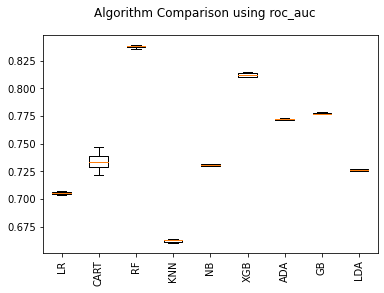

precision

 n_splits 5 random_state 12345
LR: 0.716125 (0.003070)

 n_splits 5 random_state 12345
CART: 0.757505 (0.007662)

 n_splits 5 random_state 12345
RF: 0.837201 (0.002680)

 n_splits 5 random_state 12345
KNN: 0.647949 (0.000922)

 n_splits 5 random_state 12345
NB: 0.812963 (0.001518)

 n_splits 5 random_state 12345
[18:11:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

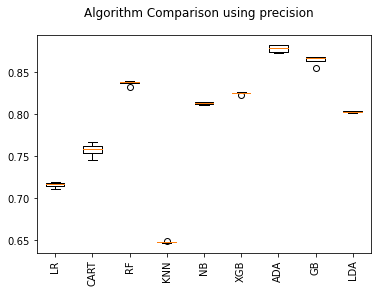

recall

 n_splits 5 random_state 12345
LR: 0.612374 (0.003013)

 n_splits 5 random_state 12345
CART: 0.760863 (0.009656)

 n_splits 5 random_state 12345
RF: 0.671413 (0.001891)

 n_splits 5 random_state 12345
KNN: 0.672092 (0.002403)

 n_splits 5 random_state 12345
NB: 0.544867 (0.000898)

 n_splits 5 random_state 12345
[18:21:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'lo

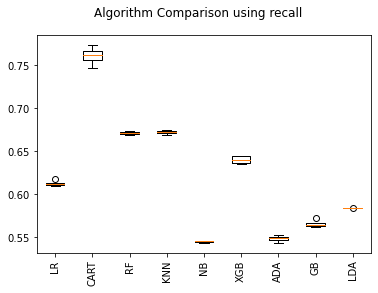

accuracy

 n_splits 5 random_state 12345
LR: 0.654788 (0.001342)

 n_splits 5 random_state 12345
CART: 0.737000 (0.009432)

 n_splits 5 random_state 12345
RF: 0.747387 (0.001873)

 n_splits 5 random_state 12345
KNN: 0.620464 (0.000278)

 n_splits 5 random_state 12345
NB: 0.682119 (0.000387)

 n_splits 5 random_state 12345
[18:32:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

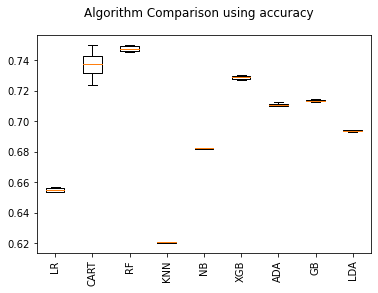

In [42]:
n_splits     =    5
random_state =    12345

compare_models(n_splits, random_state, X, y)

In [30]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we